In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv')

In [30]:
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [3]:
df.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344352e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866841e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.270000e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


In [31]:
df.btc_market_price[1023]

13.6888

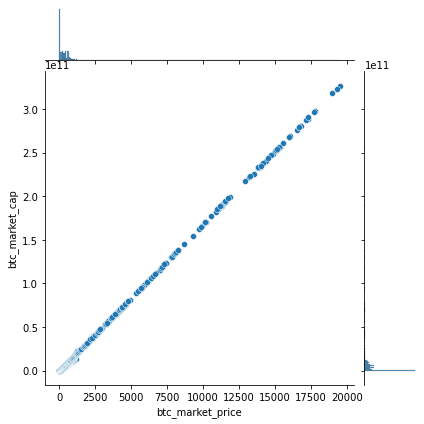

In [57]:
sns.jointplot(data = df, x = 'btc_market_price', y = 'btc_market_cap')

In [56]:
stats.pearsonr(df.btc_market_price, df.btc_market_cap)

(0.9997826765218778, 0.0)

In [5]:
df['btc_market_cap'].fillna(value = df['btc_market_cap'].mean(), inplace = True)

In [6]:
df['btc_n_transactions'].fillna(value = df['btc_n_transactions'].mean(), inplace = True)

In [7]:
df['btc_miners_revenue'].fillna(value = df['btc_miners_revenue'].mean(), inplace = True)

In [8]:
df['btc_cost_per_transaction'].fillna(value = df['btc_cost_per_transaction'].mean(), inplace = True)

In [9]:
df['btc_difficulty'].fillna(value = df['btc_difficulty'].mean(), inplace = True)

In [10]:
df['btc_hash_rate'].fillna(value = df['btc_hash_rate'].mean(), inplace = True)

In [11]:
df['btc_cost_per_transaction_percent'].fillna(value = df['btc_cost_per_transaction_percent'].mean(), inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [17]:
X = df[['btc_market_cap', 'btc_n_transactions', 'btc_miners_revenue', 'btc_cost_per_transaction', 'btc_difficulty', 'btc_hash_rate', 'btc_cost_per_transaction_percent']]
Y = df[['btc_market_price']]
X.head()

,btc_market_cap,btc_n_transactions,btc_miners_revenue,btc_cost_per_transaction,btc_difficulty,btc_hash_rate,btc_cost_per_transaction_percent
0,0.0,244,0.0,0.0,2.527738,0.000029,31.781022
1,0.0,235,0.0,0.0,2.527738,0.000029,154.463801
2,0.0,183,0.0,0.0,2.527738,0.000023,1278.516635
3,0.0,224,0.0,0.0,2.527738,0.000028,22186.687990
4,0.0,218,0.0,0.0,2.527738,0.000027,689.179876


In [18]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)

In [19]:
x_train

,btc_market_cap,btc_n_transactions,btc_miners_revenue,btc_cost_per_transaction,btc_difficulty,btc_hash_rate,btc_cost_per_transaction_percent
215,2.567129e+05,422,6.688700e+02,1.585000,9.178307e+02,9.627004e-03,28.452464
0,0.000000e+00,244,0.000000e+00,0.000000,2.527738e+00,2.920000e-05,31.781022
2036,3.361876e+09,165993,9.439200e+05,5.686505,5.695765e+10,4.615150e+05,1.626524
2110,5.270689e+09,171602,1.301571e+06,7.584822,7.272278e+10,5.278001e+05,1.178125
500,1.108367e+08,9454,1.445678e+05,15.291710,1.379192e+06,1.199800e+01,9.630648
...,...,...,...,...,...,...,...
2837,1.380000e+11,305735,1.671236e+07,56.566476,1.360000e+12,9.977011e+06,0.642572
1827,3.253437e+09,104555,9.488748e+05,9.075365,4.445542e+10,3.557924e+05,2.304153
570,4.495072e+07,6453,4.442482e+04,6.884367,1.777774e+06,1.263743e+01,9.622504
1558,7.368496e+09,53928,2.175800e+06,40.346388,1.045572e+10,7.848326e+04,3.440852


In [20]:
lr = LinearRegression()

In [21]:
lr.fit(x_train, y_train)

LinearRegression()

In [26]:
prediction = lr.predict(x_test)
prediction

array([[ 5.25371285e+00],
       [ 9.47034146e+01],
       [ 1.29201961e+01],
       [ 1.66355362e+02],
       [ 3.60458284e+03],
       [-1.31374835e+01],
       [ 5.75502727e+01],
       [-6.25947763e+00],
       [ 6.77940210e+02],
       [-1.37525324e+01],
       [ 3.31464964e+02],
       [-7.36842926e+00],
       [ 5.50538509e+03],
       [ 2.18182923e+01],
       [ 4.66096888e+02],
       [ 2.27587323e+02],
       [ 5.91863180e+02],
       [ 1.16070418e+01],
       [ 2.38413161e+02],
       [ 1.50351729e+01],
       [ 4.11374614e+01],
       [ 2.47554861e+02],
       [ 7.58127924e+02],
       [ 2.55499513e+01],
       [ 1.37610521e+02],
       [ 4.50073288e+01],
       [ 2.67529117e+02],
       [ 2.39305766e+02],
       [-4.48847337e+00],
       [ 9.49774597e+01],
       [ 4.32855987e+02],
       [ 4.90838392e+00],
       [ 5.84847231e+00],
       [ 1.76340786e+00],
       [ 2.35655639e+02],
       [ 3.27087623e+02],
       [ 4.33810714e+02],
       [ 5.81480309e+02],
       [ 9.7

In [23]:
lr.score(x_test, y_test)

0.9999112595453311

In [24]:
from sklearn.metrics import mean_squared_error

In [27]:
mean_squared_error(prediction, y_test)

484.0776428320798